In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [9]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Pune.csv')

In [10]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR'],
      dtype='object')

In [11]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,24.30
1,2004010114,29.14
2,2004010406,11.73
3,2004010408,18.58
4,2004010410,26.55


In [12]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,24.30
1,2004-01-01 14:00:00,29.14
2,2004-01-04 06:00:00,11.73
3,2004-01-04 08:00:00,18.58
4,2004-01-04 10:00:00,26.55


In [13]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,24.30
2004-01-01 14:00:00,2004-01-01 14:00:00,29.14
2004-01-04 06:00:00,2004-01-04 06:00:00,11.73
2004-01-04 08:00:00,2004-01-04 08:00:00,18.58
2004-01-04 10:00:00,2004-01-04 10:00:00,26.55


In [14]:
data=data.sort_index()

In [15]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,15.16
2004-01-01 06:00:00,2004-01-01 06:00:00,14.92
2004-01-01 07:00:00,2004-01-01 07:00:00,16.80
2004-01-01 08:00:00,2004-01-01 08:00:00,20.33
2004-01-01 09:00:00,2004-01-01 09:00:00,24.30


In [16]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [17]:
#checking for duplicated entried
data.duplicated().sum()

120

In [18]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [19]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,19.19
2024-02-19 01:00:00,2024-02-19 01:00:00,19.17
2024-02-19 02:00:00,2024-02-19 02:00:00,19.18
2024-02-19 03:00:00,2024-02-19 03:00:00,19.16
2024-02-19 04:00:00,2024-02-19 04:00:00,19.14


In [20]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,22.64
2024-02-18 20:00:00,2024-02-18 20:00:00,21.29
2024-02-18 21:00:00,2024-02-18 21:00:00,20.29
2024-02-18 22:00:00,2024-02-18 22:00:00,19.66
2024-02-18 23:00:00,2024-02-18 23:00:00,19.33


In [21]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [22]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

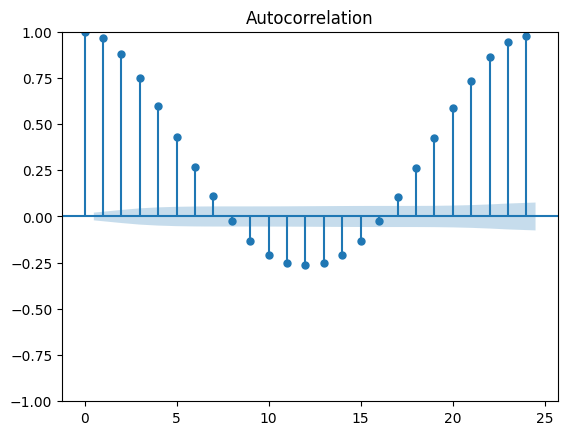

In [23]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

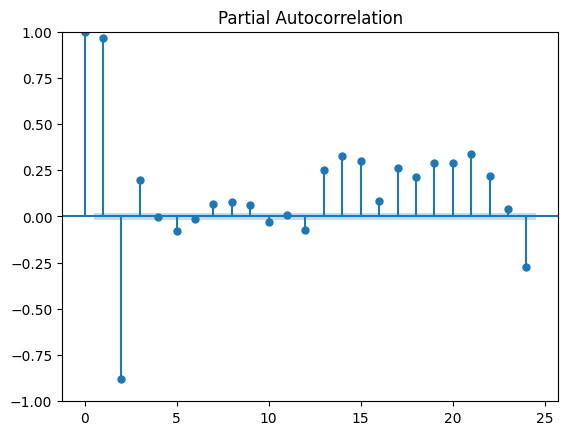

In [24]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [25]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [26]:
#to store RMSE after every year
rmse_record={}

In [27]:
# Fit SARIMA model
pune_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
pune_result = pune_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14633D-01    |proj g|=  4.41166D-01


 This problem is unconstrained.



At iterate    5    f=  9.92566D-02    |proj g|=  6.62157D-01

At iterate   10    f=  6.71143D-02    |proj g|=  1.14154D-01

At iterate   15    f=  6.50682D-02    |proj g|=  1.30511D-02

At iterate   20    f=  6.49017D-02    |proj g|=  1.08856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     31      1     0     0   1.793D-05   6.490D-02
  F =   6.4901722336735412E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [28]:
# Forecast temperatures for the next 48 hours
forecast = pune_result.get_forecast(steps=48)

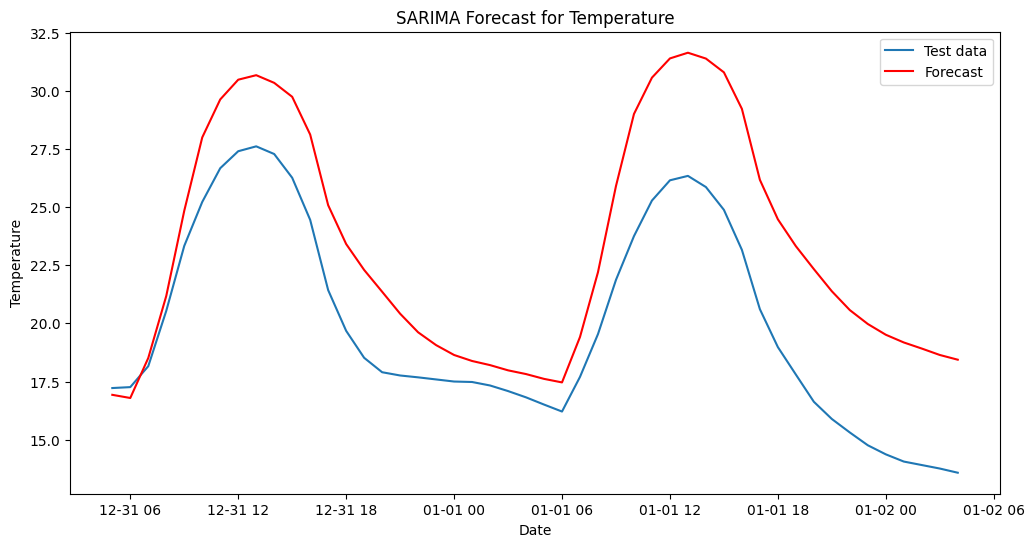

In [29]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3.8754840284922127


In [31]:
rmse_record[1]=rmse

In [32]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


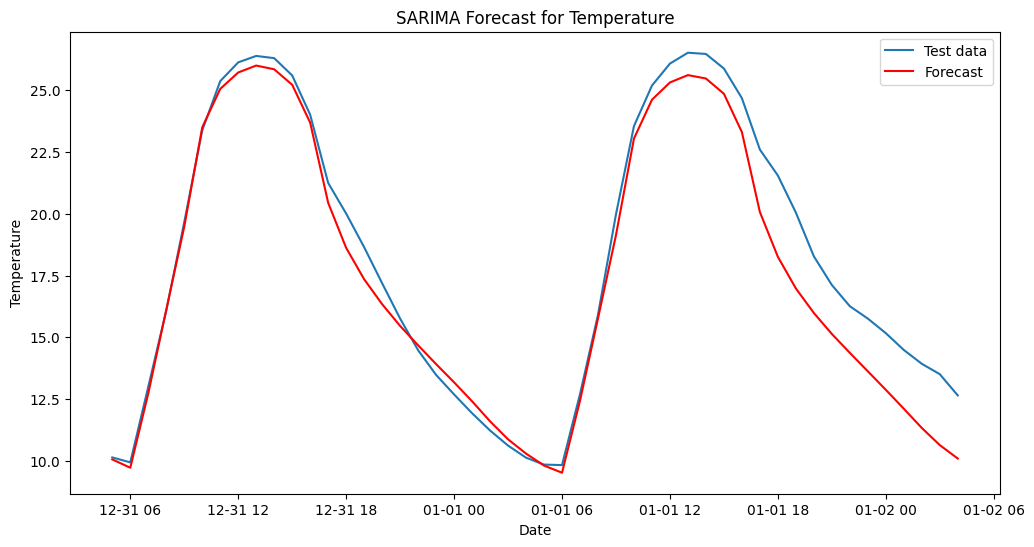

Root Mean Squared Error (RMSE): 1.3708543192919591
training now:  3


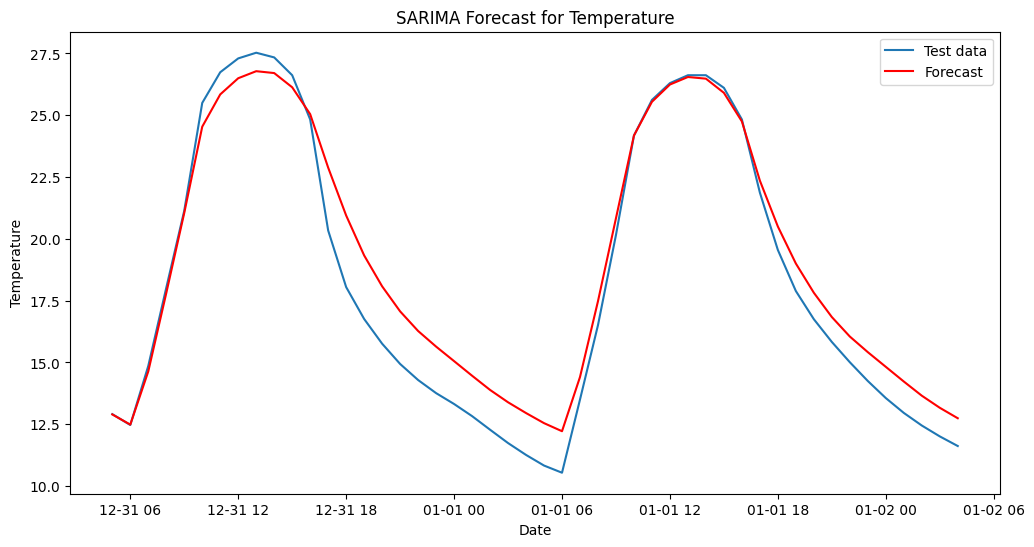

Root Mean Squared Error (RMSE): 1.2808134269575768
training now:  4


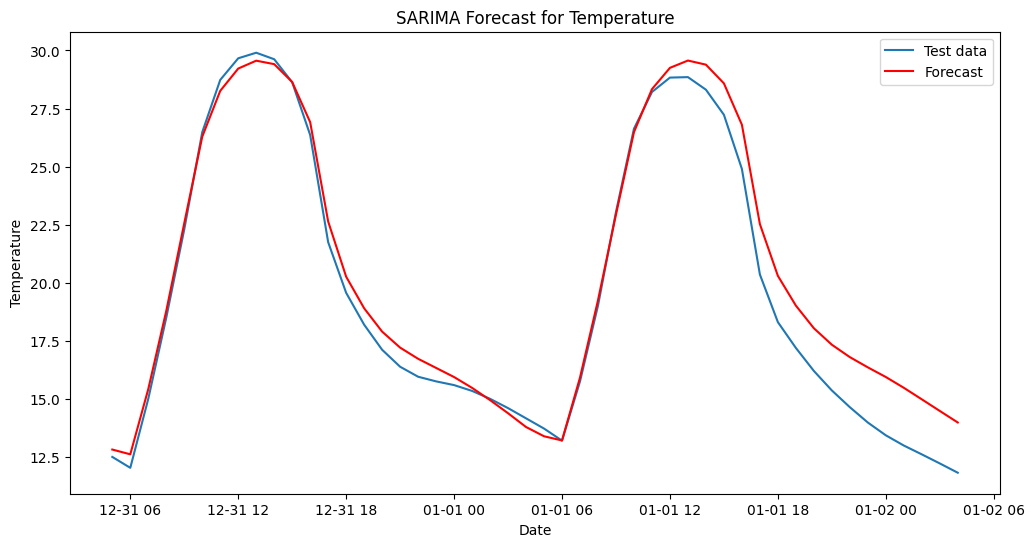

Root Mean Squared Error (RMSE): 1.2151579949246782
training now:  5


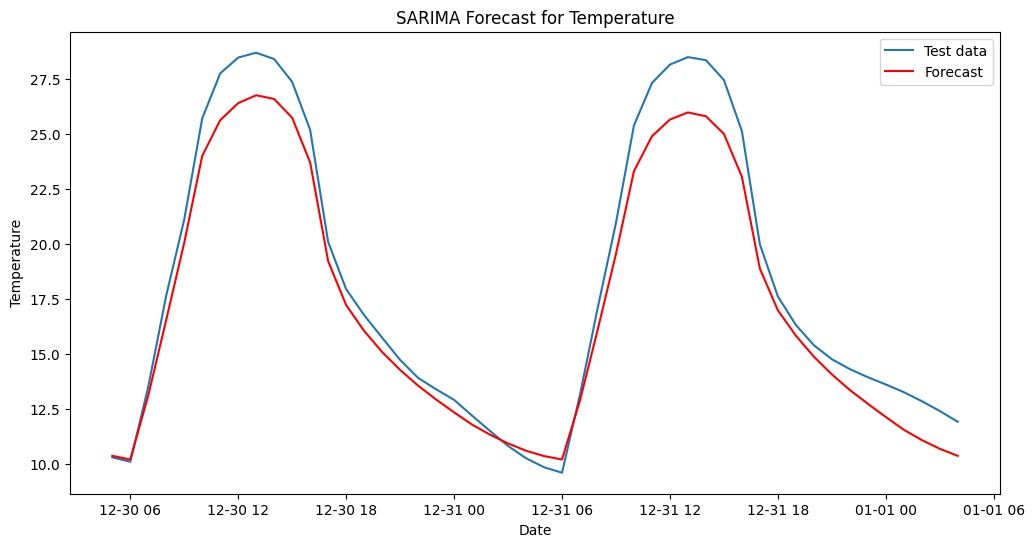

Root Mean Squared Error (RMSE): 1.3818545810943081
training now:  6


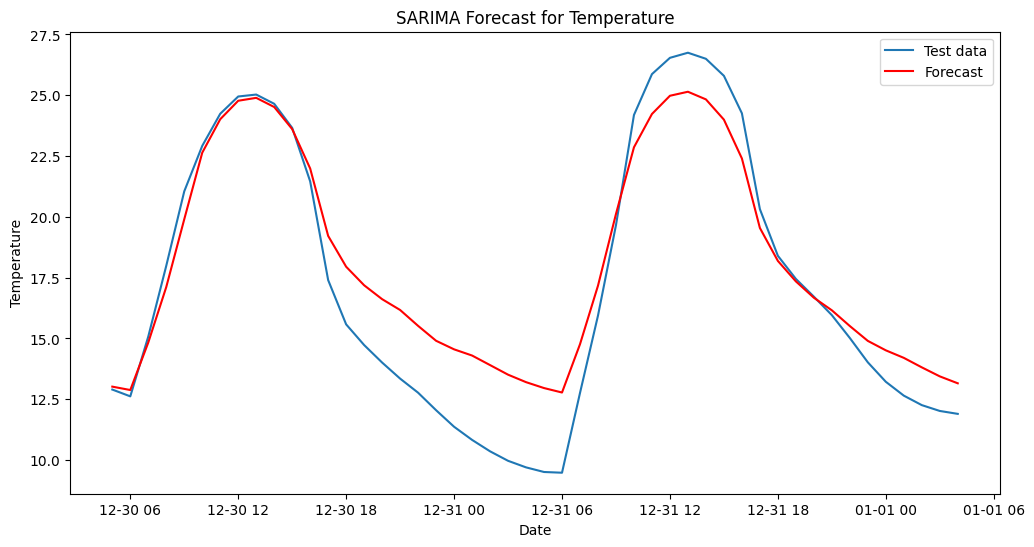

Root Mean Squared Error (RMSE): 1.8650774458012913
training now:  7


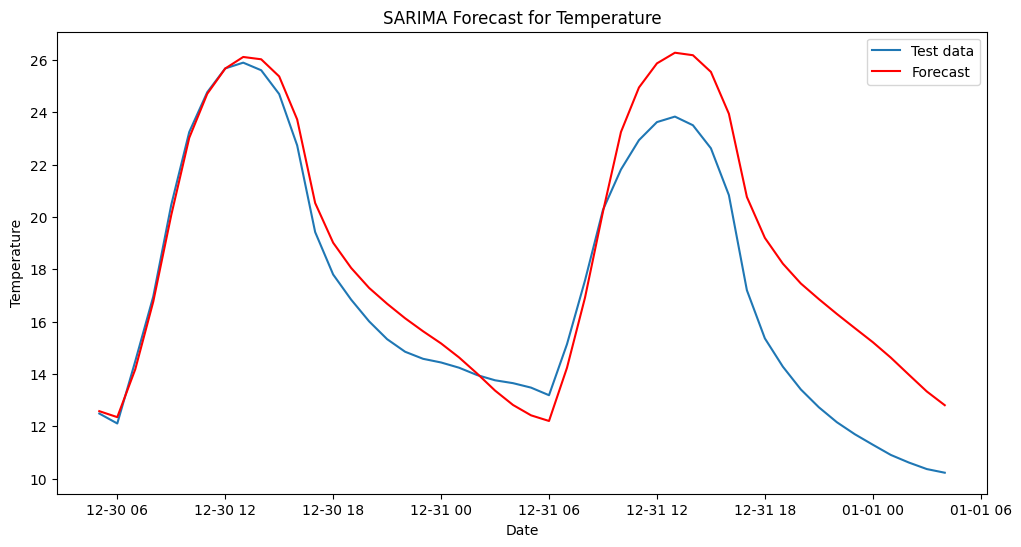

Root Mean Squared Error (RMSE): 2.166861778048861
training now:  8


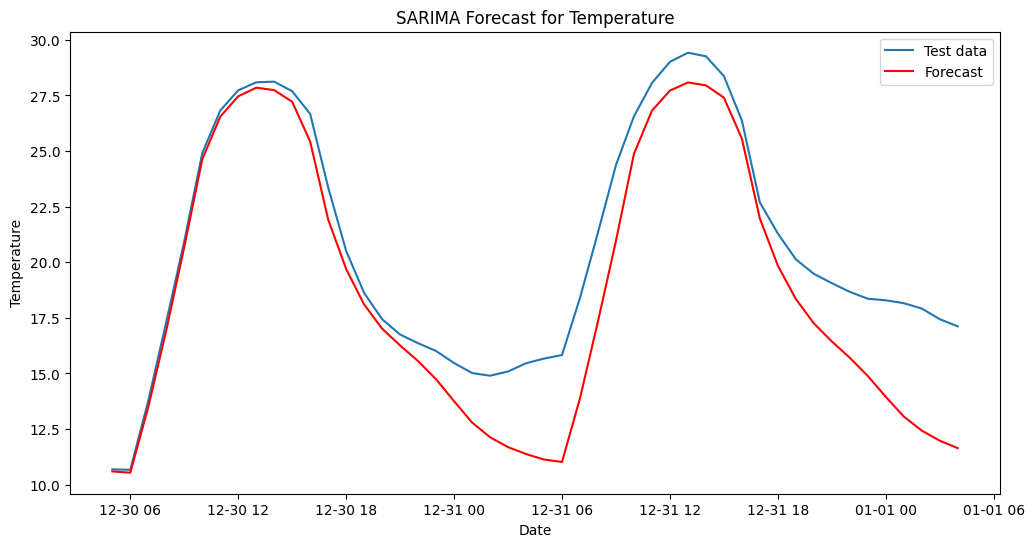

Root Mean Squared Error (RMSE): 2.6137559957905383
training now:  9


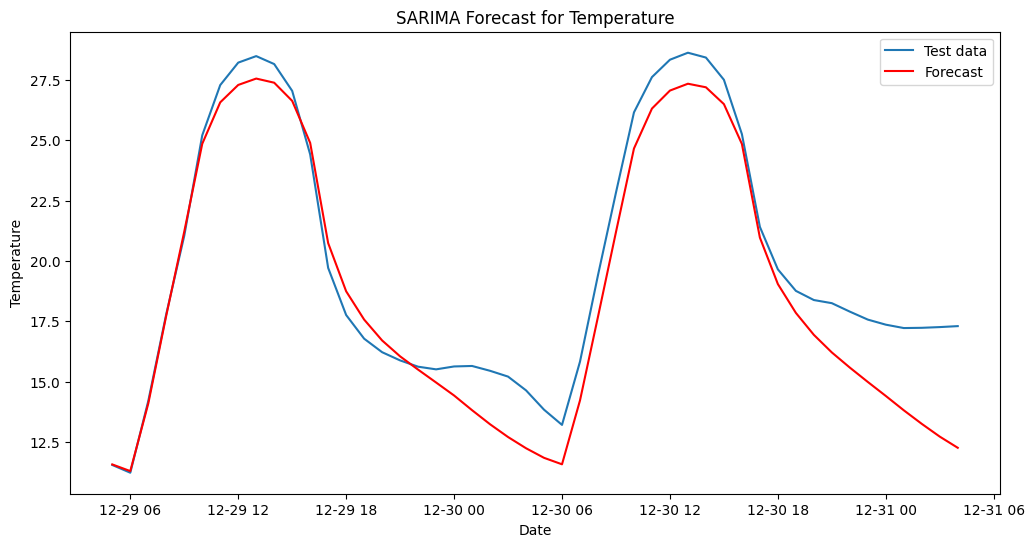

Root Mean Squared Error (RMSE): 1.7959712004765467
training now:  10


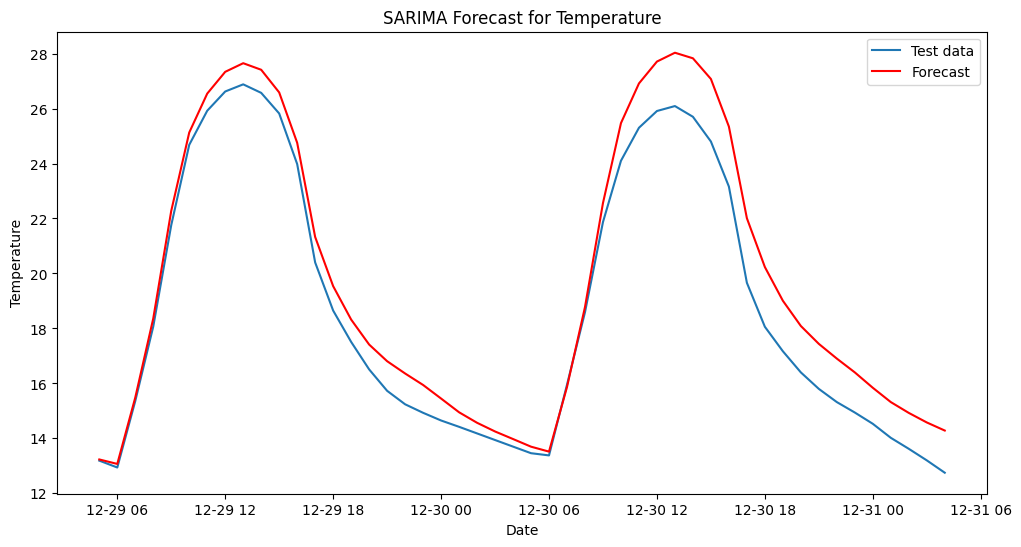

Root Mean Squared Error (RMSE): 1.2204205680023974
training now:  11


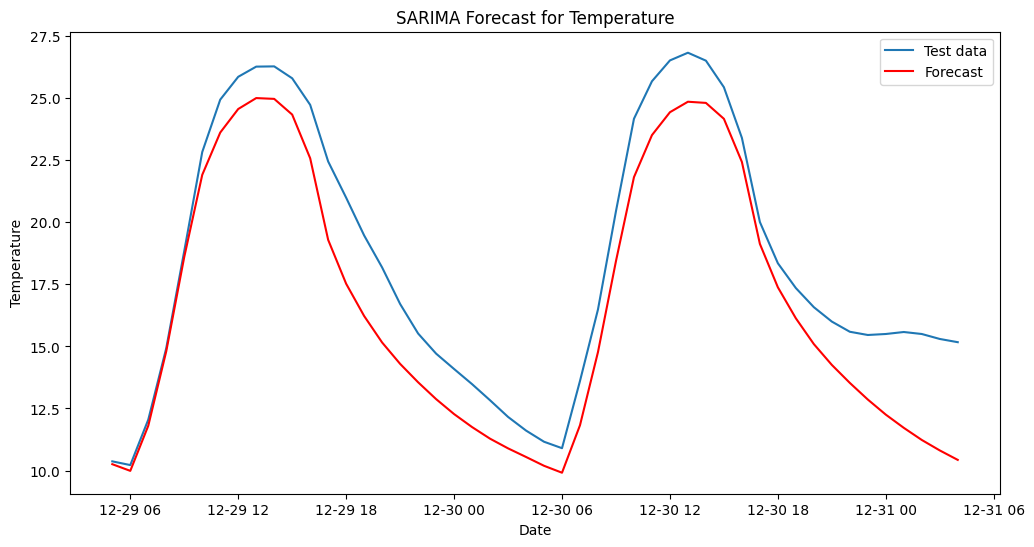

Root Mean Squared Error (RMSE): 2.1529289047999374
training now:  12


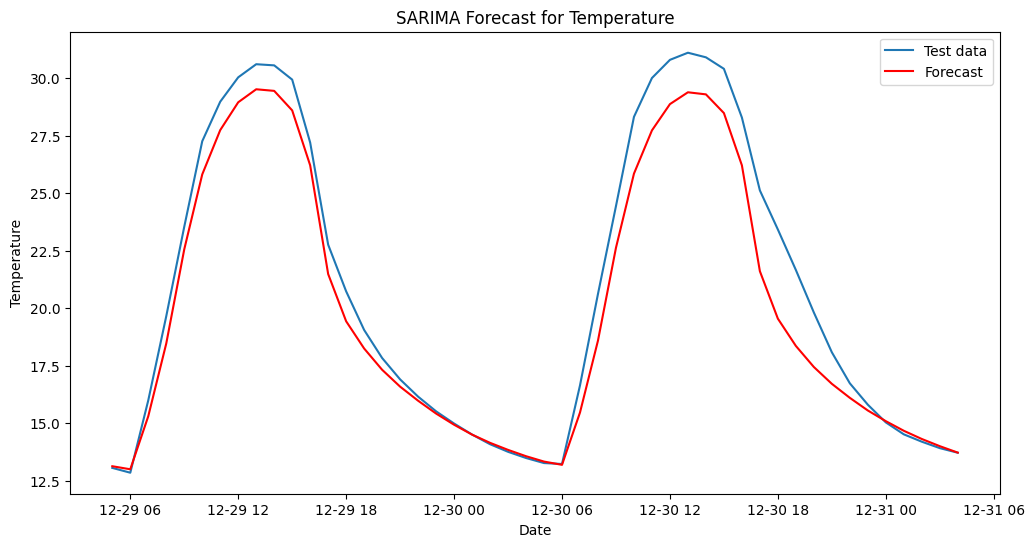

Root Mean Squared Error (RMSE): 1.4504155302549044
training now:  13


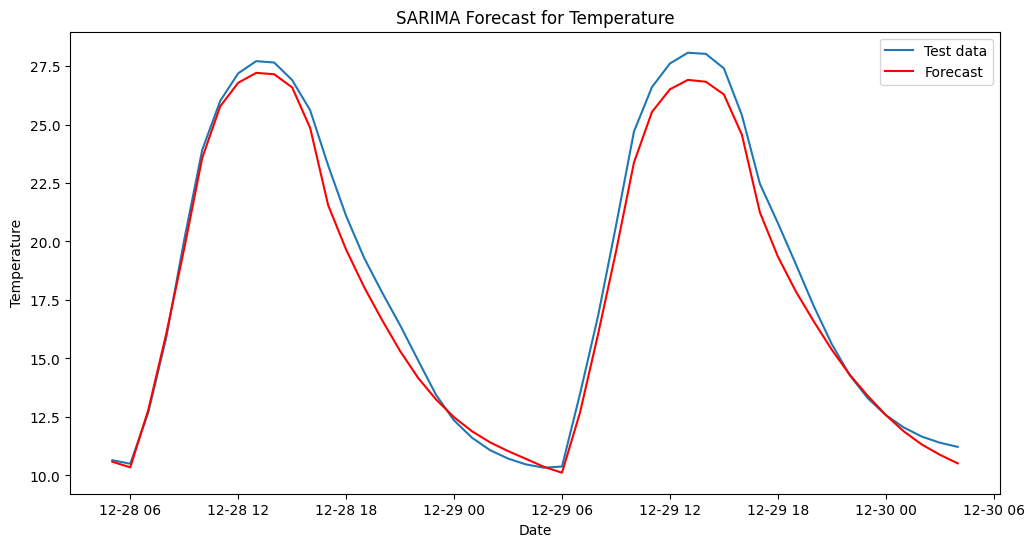

Root Mean Squared Error (RMSE): 0.7834784431956582
training now:  14


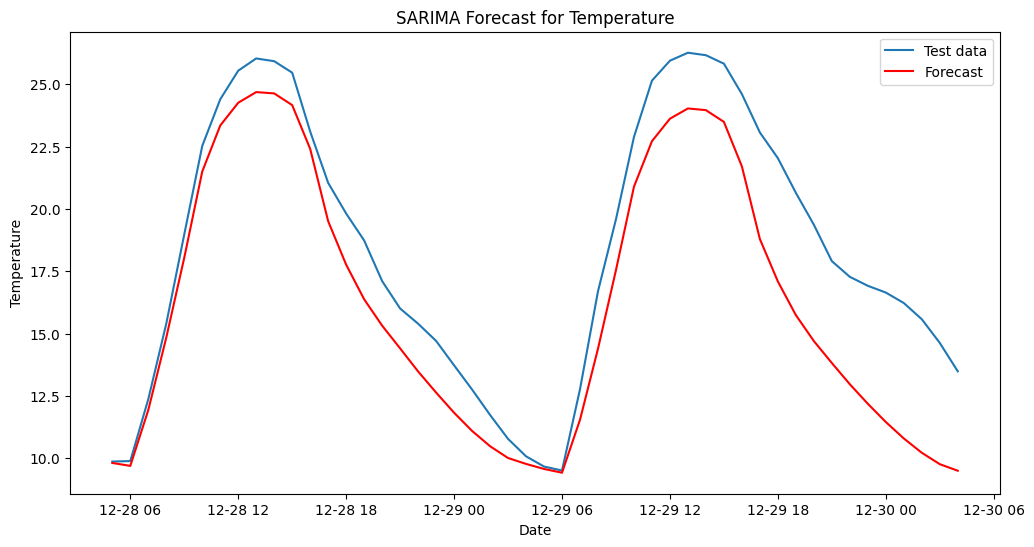

Root Mean Squared Error (RMSE): 2.7626015550072345
training now:  15


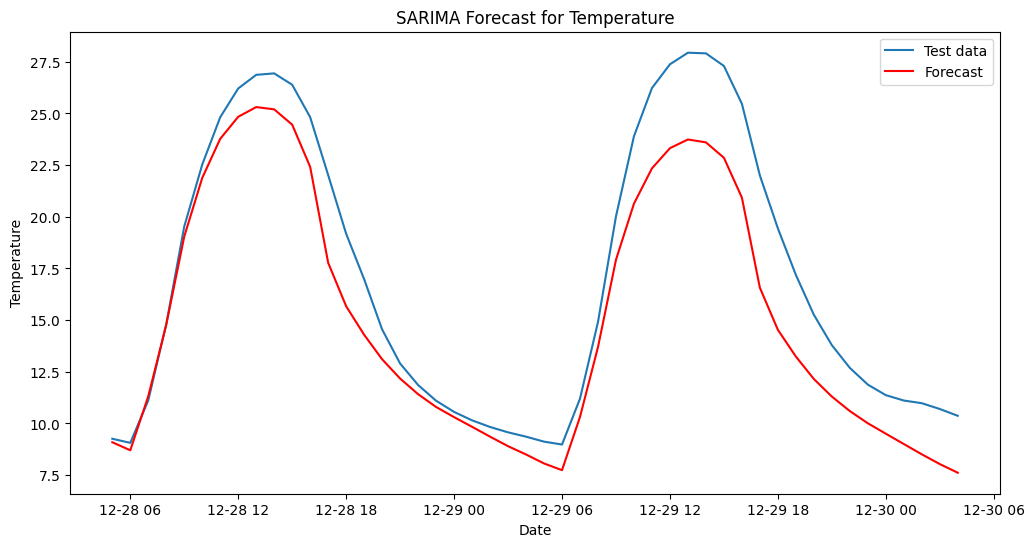

Root Mean Squared Error (RMSE): 2.5435582216925936
training now:  16


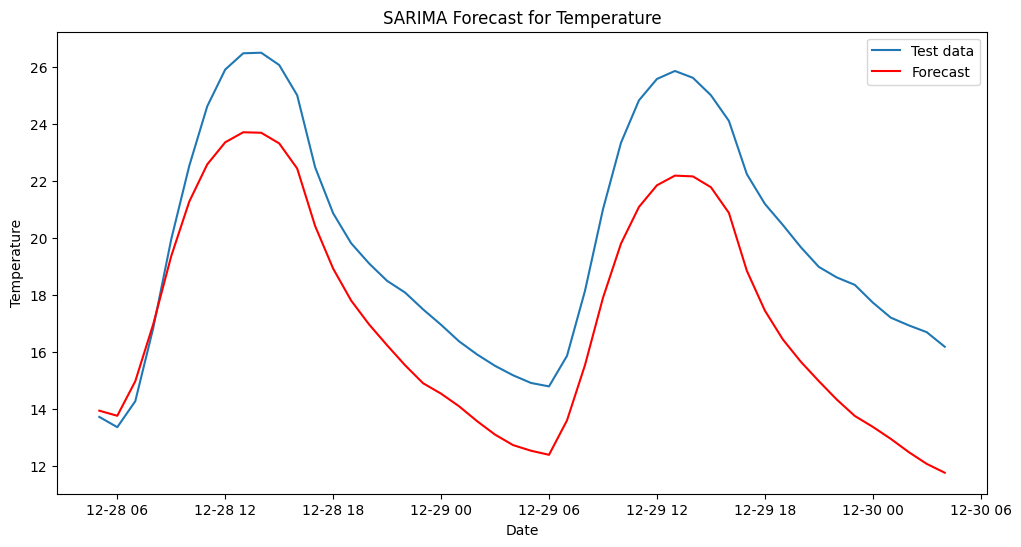

Root Mean Squared Error (RMSE): 3.0162030486372036
training now:  17


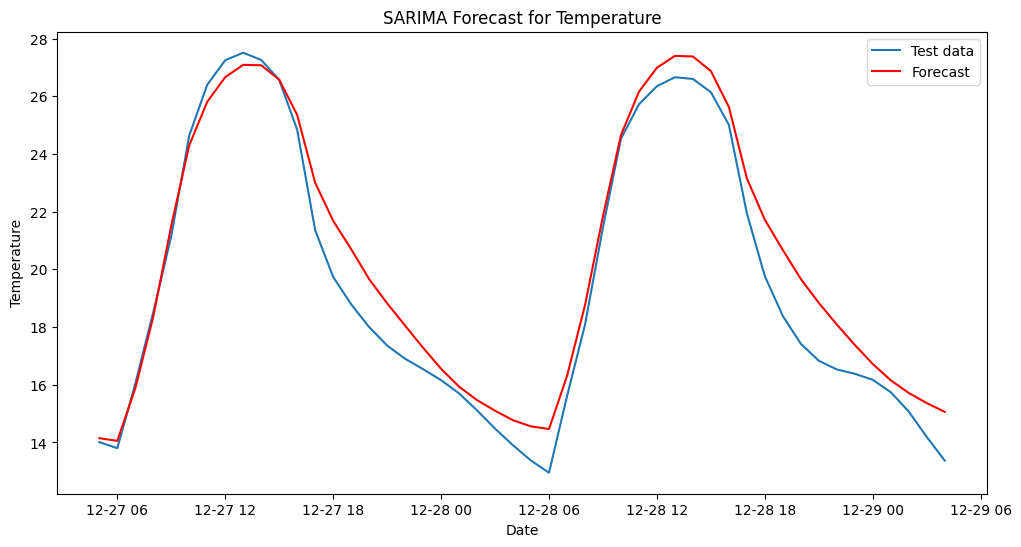

Root Mean Squared Error (RMSE): 1.0761704588796694
training now:  18


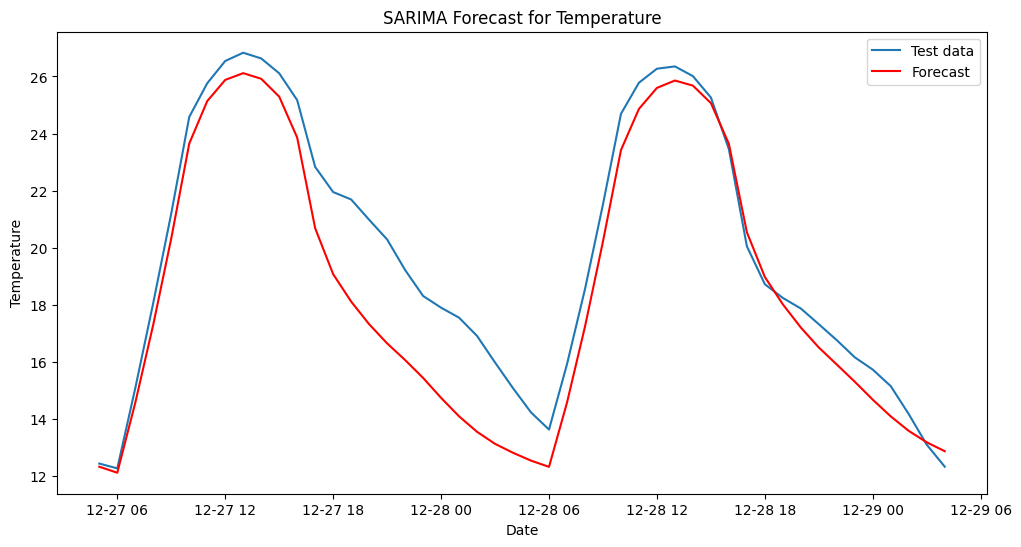

Root Mean Squared Error (RMSE): 1.7235994872898306
training now:  19


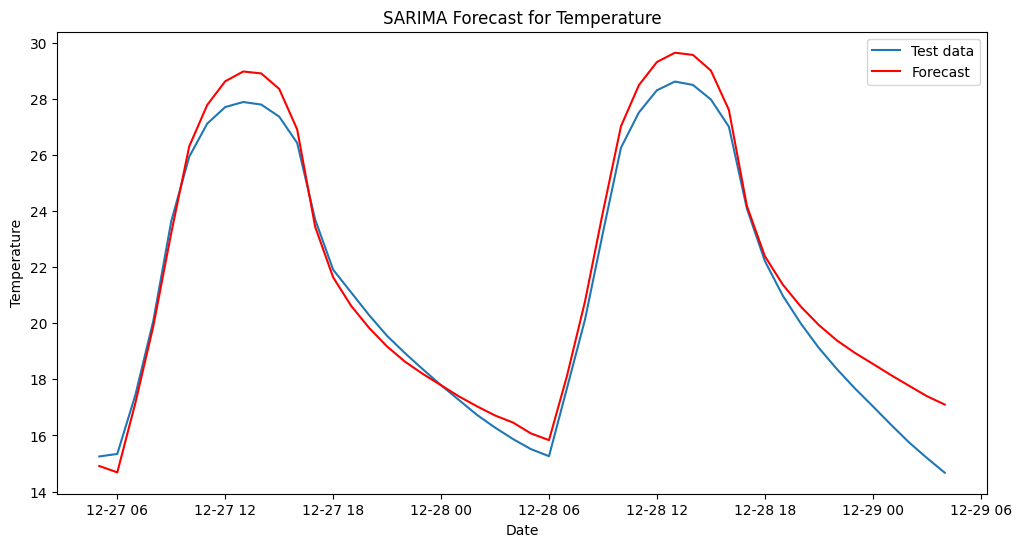

Root Mean Squared Error (RMSE): 0.9064725129666669
training now:  20


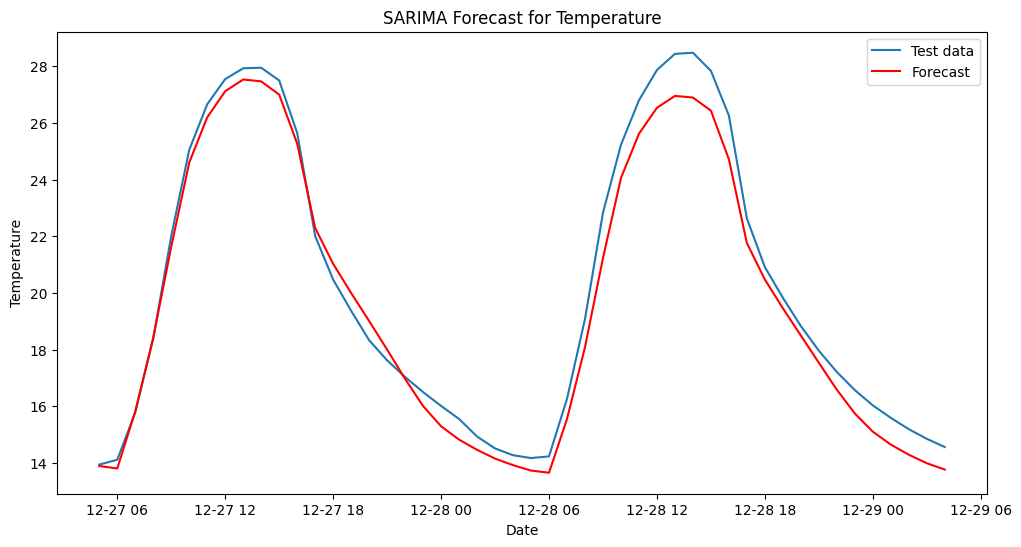

Root Mean Squared Error (RMSE): 0.7821627854504174


In [33]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    pune_result=pune_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = pune_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [34]:
rmse_record

{1: 3.8754840284922127,
 2: 1.3708543192919591,
 3: 1.2808134269575768,
 4: 1.2151579949246782,
 5: 1.3818545810943081,
 6: 1.8650774458012913,
 7: 2.166861778048861,
 8: 2.6137559957905383,
 9: 1.7959712004765467,
 10: 1.2204205680023974,
 11: 2.1529289047999374,
 12: 1.4504155302549044,
 13: 0.7834784431956582,
 14: 2.7626015550072345,
 15: 2.5435582216925936,
 16: 3.0162030486372036,
 17: 1.0761704588796694,
 18: 1.7235994872898306,
 19: 0.9064725129666669,
 20: 0.7821627854504174}

In [35]:
forecast2.predicted_mean

2023-12-27 05:00:00    13.888936
2023-12-27 06:00:00    13.804055
2023-12-27 07:00:00    15.822642
2023-12-27 08:00:00    18.419783
2023-12-27 09:00:00    21.632645
2023-12-27 10:00:00    24.603339
2023-12-27 11:00:00    26.200351
2023-12-27 12:00:00    27.120360
2023-12-27 13:00:00    27.534620
2023-12-27 14:00:00    27.468407
2023-12-27 15:00:00    27.001343
2023-12-27 16:00:00    25.271265
2023-12-27 17:00:00    22.295373
2023-12-27 18:00:00    21.026373
2023-12-27 19:00:00    19.997071
2023-12-27 20:00:00    19.009765
2023-12-27 21:00:00    17.997529
2023-12-27 22:00:00    16.964350
2023-12-27 23:00:00    16.006362
2023-12-28 00:00:00    15.291006
2023-12-28 01:00:00    14.821450
2023-12-28 02:00:00    14.460040
2023-12-28 03:00:00    14.151515
2023-12-28 04:00:00    13.919162
2023-12-28 05:00:00    13.728025
2023-12-28 06:00:00    13.652539
2023-12-28 07:00:00    15.549580
2023-12-28 08:00:00    18.083240
2023-12-28 09:00:00    21.230251
2023-12-28 10:00:00    24.055701
2023-12-28

In [36]:
train_data=data[175200:]

In [37]:
pune_result=pune_result.extend(train_data["TEMP"])
forecast2 = pune_result.get_forecast(steps=48)


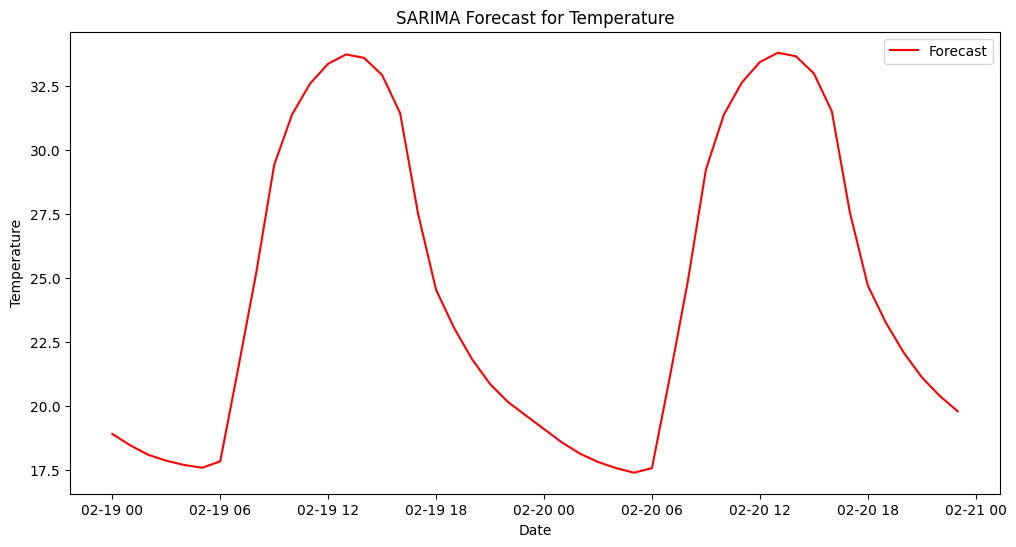

In [38]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [39]:
#saving pickle file of model
with open("/kaggle/working/pune_model.pkl", 'wb') as f:
    pickle.dump(pune_result, f)

In [40]:
forecast2.predicted_mean

2024-02-19 00:00:00    18.917952
2024-02-19 01:00:00    18.471227
2024-02-19 02:00:00    18.101992
2024-02-19 03:00:00    17.870918
2024-02-19 04:00:00    17.704065
2024-02-19 05:00:00    17.596277
2024-02-19 06:00:00    17.845445
2024-02-19 07:00:00    21.481488
2024-02-19 08:00:00    25.204940
2024-02-19 09:00:00    29.425423
2024-02-19 10:00:00    31.403563
2024-02-19 11:00:00    32.604551
2024-02-19 12:00:00    33.376968
2024-02-19 13:00:00    33.740363
2024-02-19 14:00:00    33.604322
2024-02-19 15:00:00    32.932989
2024-02-19 16:00:00    31.448842
2024-02-19 17:00:00    27.510409
2024-02-19 18:00:00    24.544583
2024-02-19 19:00:00    23.058257
2024-02-19 20:00:00    21.835323
2024-02-19 21:00:00    20.867448
2024-02-19 22:00:00    20.161525
2024-02-19 23:00:00    19.632856
2024-02-20 00:00:00    19.106187
2024-02-20 01:00:00    18.583808
2024-02-20 02:00:00    18.145557
2024-02-20 03:00:00    17.822896
2024-02-20 04:00:00    17.584068
2024-02-20 05:00:00    17.401833
2024-02-20